### Out of the pairs of features and sessions that were originally used for CCGP of value, how many units per pair are also preference selective?

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
from scripts.pseudo_decoding.single_selected_feature_configs import *

from scipy import stats
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools

In [2]:
subject = "SA"
trial_event = "StimOnset"
sig_path = SIG_UNITS_PATH.format(
    sub=subject,
    event=trial_event,
    level="95th_all_time",
)
sig_units = pd.read_pickle(sig_path)
sig_units["session"] = (sig_units.PseudoUnitID / 100).astype(int)

In [3]:
sig_units

,PseudoUnitID,feat,session
0,2018070925,CIRCLE,20180709
1,2018070939,CIRCLE,20180709
2,2018091813,CIRCLE,20180918
3,2018091813,CYAN,20180918
4,2018091815,CIRCLE,20180918
...,...,...,...
425,2018061505,SWIRL,20180615
426,2018061509,SWIRL,20180615
427,2018061514,SWIRL,20180615
428,2018061516,SWIRL,20180615


In [4]:
SA_MORE_SESS_PAIRS_PATH = "/data/patrick_res/sessions/SA/pairs_at_least_3blocks_10sess_more_sess.pickle"
pairs = pd.read_pickle(SA_MORE_SESS_PAIRS_PATH)

In [5]:
def count_num_units(row):
    num_units = 0
    for feat in row.pair:
        for session in row.sessions:
            matches = sig_units[(sig_units.feat == feat) & (sig_units.session == int(session))]
            num_units += matches.PseudoUnitID.nunique()
    return num_units


pairs["num_units"] = pairs.apply(count_num_units, axis=1)

<Axes: xlabel='num_units', ylabel='Count'>

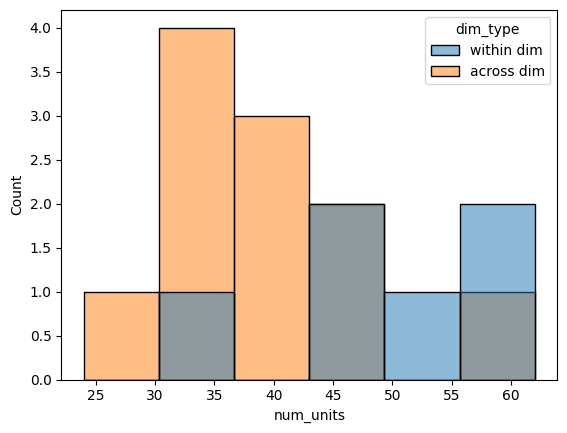

In [6]:
sns.histplot(pairs, x="num_units", hue="dim_type")

In [7]:
pairs

,pair,sessions,num_sessions,dim_type,num_units
0,"[CIRCLE, SQUARE]","[20180615, 20180709, 20180802, 20180803, 20180...",14,within dim,56
4,"[CIRCLE, GREEN]","[20180802, 20180806, 20180808, 20180813, 20180...",11,across dim,48
6,"[CIRCLE, YELLOW]","[20180802, 20180810, 20180813, 20180821, 20180...",13,across dim,62
9,"[CIRCLE, RIPPLE]","[20180615, 20180802, 20180803, 20180810, 20180...",10,across dim,40
13,"[SQUARE, CYAN]","[20180801, 20180802, 20180803, 20180820, 20180...",11,across dim,41
14,"[SQUARE, GREEN]","[20180802, 20180806, 20180808, 20180830, 20180...",10,across dim,31
15,"[SQUARE, MAGENTA]","[20180801, 20180802, 20180803, 20180806, 20180...",11,across dim,34
16,"[SQUARE, YELLOW]","[20180801, 20180802, 20180810, 20180820, 20180...",12,across dim,36
17,"[SQUARE, ESCHER]","[20180803, 20180808, 20180810, 20180820, 20180...",10,across dim,24
39,"[CYAN, MAGENTA]","[20180705, 20180801, 20180802, 20180803, 20180...",11,within dim,50
